# COGS 108 - EV Preference Analysis Across Washington Counties

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [ X ] NO - keep private

# Names

- Menghang Wu
- Cecilia Lin
- Julie Cai
- Yunfei Shih
- Guan Huang Chen

# Abstract

Please write one to four paragraphs that describe a very brief overview of why you did this, how you did, and the major findings and conclusions.

# Research Question

Is there a statistically significant difference in the preference for hybrid plug-in vehicles versus battery electric vehicles (EVs) across the counties in Washington?

## Background and Prior Work

In recent years, heightened concerns over climate change and air pollution have drawn significant attention to sustainable transportation. Electric vehicles (EVs) and hybrid vehicles are gaining traction across the United States, particularly in eco-conscious states like Washington. These vehicles are essential for reducing greenhouse gas emissions and lowering dependency on fossil fuels. Additionally, rising fuel prices are prompting more consumers to consider electric or fuel-efficient hybrid options.

Although both governments and businesses actively promote the electric vehicle market, consumer preferences vary considerably by region, especially in the choice between hybrid vehicles and battery electric vehicles (BEVs). Understanding these regional preferences offers valuable insights for assessing market demand and shaping policies that support a smoother transition toward electrification in the transportation sector.

Prior studies indicate that preferences for EVs and hybrids differ across geographic regions. In a study by Nelder and Jung (2016)<a name="cite_ref-1.1"></a>[<sup>1</sup>](#cite_note-1.1), factors influencing the adoption of EVs were examined, including the distribution of charging infrastructure, vehicle range, and geographic characteristics. These factors significantly impact the efficiency of both hybrid and electric vehicles, influencing consumer preferences for each type across different areas.

Another relevant study by Morrissey et al. (2016)<a name="cite_ref-1.2"></a>[<sup>2</sup>](#cite_note-1.2) analyzed EV adoption patterns in several European countries, focusing on urban versus rural regions. They found that urban consumers were more inclined to choose BEVs due to readily available charging infrastructure, whereas rural areas favored hybrids, given their flexibility in regions with limited charging options. This research supports the notion that consumer preferences for hybrids and BEVs may vary based on infrastructure and geography, aligning closely with our research question of whether statistically significant preference differences exist across Washington counties.

References:
1. <a name="cite_note-1.1"></a> [^](#cite_ref-1)Nelder, C., & Jung, C. (2016). The future of electric vehicles in the U.S.: Forecasts and projections. Rocky Mountain Institute.https://rmi.org

2. <a name="cite_note-1.2"></a> [^](#cite_ref-2)Morrissey, P., Weldon, P., & O'Mahony, M. (2016). Future standard and fast charging infrastructure planning: An analysis of charging behaviour in EV-ready urban regions. Journal of Transport Geography.
https://www.infona.pl/resource/bwmeta1.element.elsevier-5c9e73d4-17a4-38da-ae24-db1598cce4d7


# Hypothesis


We predict that the counties across Washington has a statistically significant preference for battery electric vehicles (BEVs) over hybrid plug-in vehicle. The preference will be measure by the ratio of BEV and plug-in vehicle across the counties. We believe that people perfer BEVs more because the price of BEVs is lower than hybrid vehicles and consumers do not need to be concerned with the fluctuating price of gasoline.

# Data

## Data Description

- Dataset #1
  - Dataset Name: Electric Vehicle Population Data
  - Link to the dataset: https://catalog.data.gov/dataset/electric-vehicle-population-data
  - Number of observations: 210162
  - Number of variables: 17

The dataset includes all electric car registered across the counties in Washington state, and the model year of the EVs varied from 1999 to 2025. It has 210162 rows of observations as the population, and we could sample randomly from the dataset if needed. The dataset allows us to conduct for statistical analysis since the samples would be over 1000 observations.

Most of the variables are categorical variables, stored as string, such as County, City, Model Year, Make, and Electric Vehicle Type. There are only two quantitative variables stored as float, which is Electric Range and Base MSRP. Electric Range describes the distance that EV can travel on a single charge of its battery, while Base MSRP describes the manufacturer price of a EV without any additional features.

The important variables of the dataset for our project are County and Electric Vehicle Type. The County column includes the county of the EV is registered in, and the Electric Vehicle Type identifies the vehicle as Plug-in Hybrid Electric Vehicle (PHEV) or Battery Electric Vehicle (BEV). ANother variable that we might dive into would be Base MSRP since we think there would be more BEVs due to the cheaper price.

To prepare for the analysis, we could store the dataset as a Pandas dataframe, drop uncessary features to lessen computational burden, check missing values, and ensure correct data types for features. We would also group by the EV by counties to gain insight on the percent ratio of BEVs and PHEVs across the counties.

## Electric Vehicle Population Data

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ev_population = pd.read_csv('Electric_Vehicle_Population_Data.csv')
ev_population.head(3)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35.0,267929112,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,5YJ3E1EB1J,Kitsap,Poulsbo,WA,98370.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,23.0,475911439,POINT (-122.6368884 47.7469547),PUGET SOUND ENERGY INC,5.303509e+10
2,WP0AD2A73G,Snohomish,Bothell,WA,98012.0,2016,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,15.0,0.0,1.0,101971278,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10


### Data Cleaning/Processing

In [3]:
#check number of observations and variables
ev_population.shape

(210165, 17)

In [4]:
#check datatypes
ev_population.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                       float64
Base MSRP                                            float64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [5]:
# drop irrevelant columns and keep variables that we might use for analysis
ev_clean = ev_population.drop(columns = ['VIN (1-10)', 
                                         'Legislative District', 
                                         'DOL Vehicle ID',  
                                         'Electric Utility', 
                                         '2020 Census Tract',
                                         'Vehicle Location'
                                        ])
ev_clean.head()

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP
0,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0
1,Kitsap,Poulsbo,WA,98370.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0
2,Snohomish,Bothell,WA,98012.0,2016,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,15.0,0.0
3,Kitsap,Bremerton,WA,98310.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0
4,King,Redmond,WA,98052.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150.0,0.0


In [6]:
#check for missing values
ev_clean.isna().any()

County                                                True
City                                                  True
State                                                False
Postal Code                                           True
Model Year                                           False
Make                                                 False
Model                                                False
Electric Vehicle Type                                False
Clean Alternative Fuel Vehicle (CAFV) Eligibility    False
Electric Range                                        True
Base MSRP                                             True
dtype: bool

In [9]:
#check number of rows that misses given a column
ev_clean.isna().sum()

County                                               4
City                                                 4
State                                                0
Postal Code                                          4
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       5
Base MSRP                                            5
dtype: int64

The dataset is very well maintained that there is not a lot of missing values. We will dive deeper to see what are some possible missing values entries.

In [8]:
ev_clean['Base MSRP'].value_counts().head()

Base MSRP
0.0        206851
69900.0      1334
31950.0       367
52900.0       221
32250.0       142
Name: count, dtype: int64

There is missing values and a lot of 0 for base MSRP. A base MSRP of 0.00 does not make sense since a car without additional features would still not cost $0, so we will replace with nan. We fill them by the group mean base MSPR of the make of the model to limit possible bias.

In [10]:
ev_clean['Base MSRP'] = ev_clean['Base MSRP'].replace(0, np.nan)
ev_clean['Base MSRP'] = ev_clean.groupby('Make')['Base MSRP'].transform(lambda x: x.fillna(x.mean()))

#for those make that does not have a base msrp, we fill it with the mean based on the vehicle type
ev_clean['Base MSRP'] = ev_clean.groupby('Electric Vehicle Type')['Base MSRP'].transform(lambda x: x.fillna(x.mean()))


 For the categorical variables, we do not have a way to fill in missing values other than randomly assign the vehicle to a county or city, and there is not much rows missing the data. Thus, we decide to drop all missing values.

In [12]:
ev_clean = ev_clean.dropna()
ev_clean.isna().any()

County                                               False
City                                                 False
State                                                False
Postal Code                                          False
Model Year                                           False
Make                                                 False
Model                                                False
Electric Vehicle Type                                False
Clean Alternative Fuel Vehicle (CAFV) Eligibility    False
Electric Range                                       False
Base MSRP                                            False
dtype: bool

In [13]:
ev_clean.head(3)

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP
0,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,52859.547244
1,Kitsap,Poulsbo,WA,98370.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,70175.777631
2,Snohomish,Bothell,WA,98012.0,2016,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,15.0,132440.000000


Now that the data is cleaned, we will start diving into the relationships across the variables.

In [18]:
ev_clean['Electric Vehicle Type'].value_counts()

Electric Vehicle Type
Battery Electric Vehicle (BEV)            165552
Plug-in Hybrid Electric Vehicle (PHEV)     44604
Name: count, dtype: int64

In [65]:
#check number of vehicles each county has
ev_counts = ev_clean['County'].value_counts().reset_index()
ev_counts

,County,count
0,King,107111
1,Snohomish,25392
2,Pierce,16677
3,Clark,12537
4,Thurston,7719
...,...,...
198,Davis,1
199,Brown,1
200,Frederick,1
201,Santa Barbara,1


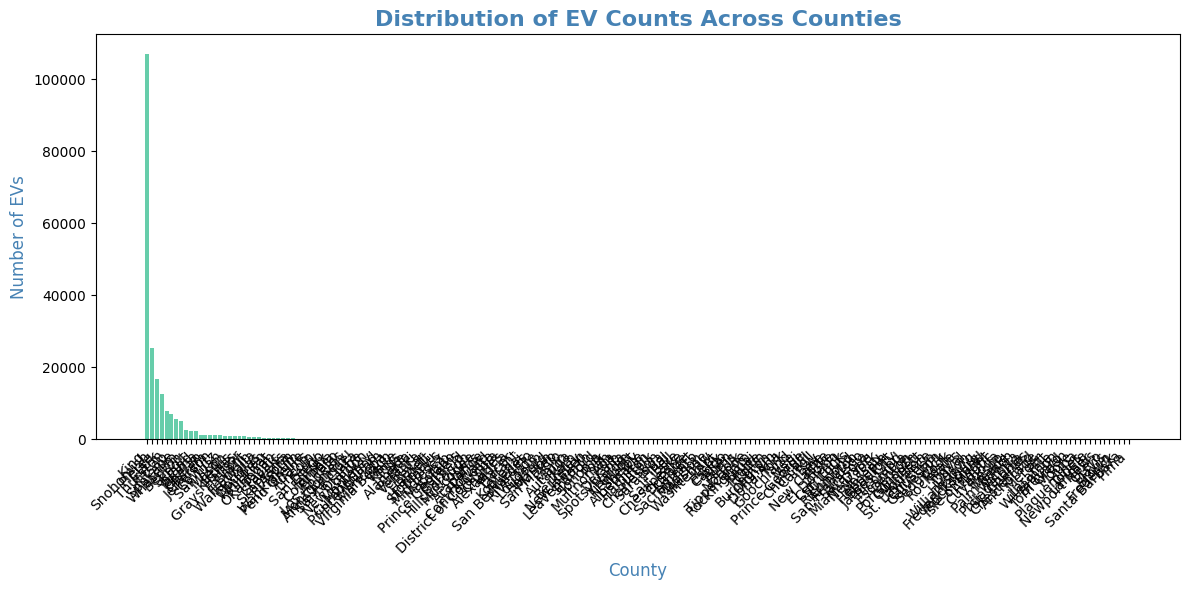

In [66]:
ev_counts.columns = ['County', 'EV Count']

plt.figure(figsize=(12, 6))
plt.bar(ev_counts['County'], ev_counts['EV Count'], color = "mediumaquamarine")
plt.title("Distribution of EV Counts Across Counties", fontsize=16, fontweight='bold', color = "steelblue")
plt.xlabel("County", fontsize=12, color = "steelblue")
plt.ylabel("Number of EVs", fontsize=12, color = "steelblue")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The graph shows the distribution of number of EVs across all counties, and it is highly skewed to the low counts of EV. We will take a closer look at the counts below.

In [68]:
ev_counts['EV Count'].value_counts()

EV Count
1         81
2         33
3         19
4         11
5          7
6          6
7719       1
6998       1
2624       1
2366       1
2244       1
1284       1
1279       1
1253       1
5700       1
5110       1
107111     1
25392      1
16677      1
12537      1
778        1
954        1
980        1
1039       1
1097       1
1140       1
772        1
737        1
258        1
249        1
736        1
539        1
441        1
412        1
353        1
320        1
60         1
67         1
68         1
71         1
87         1
220        1
32         1
31         1
10         1
11         1
12         1
15         1
18         1
20         1
9          1
7          1
Name: count, dtype: int64

The table shows that there are some counties that have less than 10 EVs in the county. The count indicates that those counties could be rural, and it impacts of infrastructure leading to people turning away from EVs. We will filter out those counties to prevent these extreme low outliers influencing our future analysis on the preference between BEVs and PHEVs. From now on, we will focus on counties that have more than 10 EVs.

In [116]:
ev_counts_filtered = ev_counts[ev_counts['EV Count'] > 10]
ev_clean = ev_clean[ev_clean['County'].isin(ev_counts_filtered['County'])]

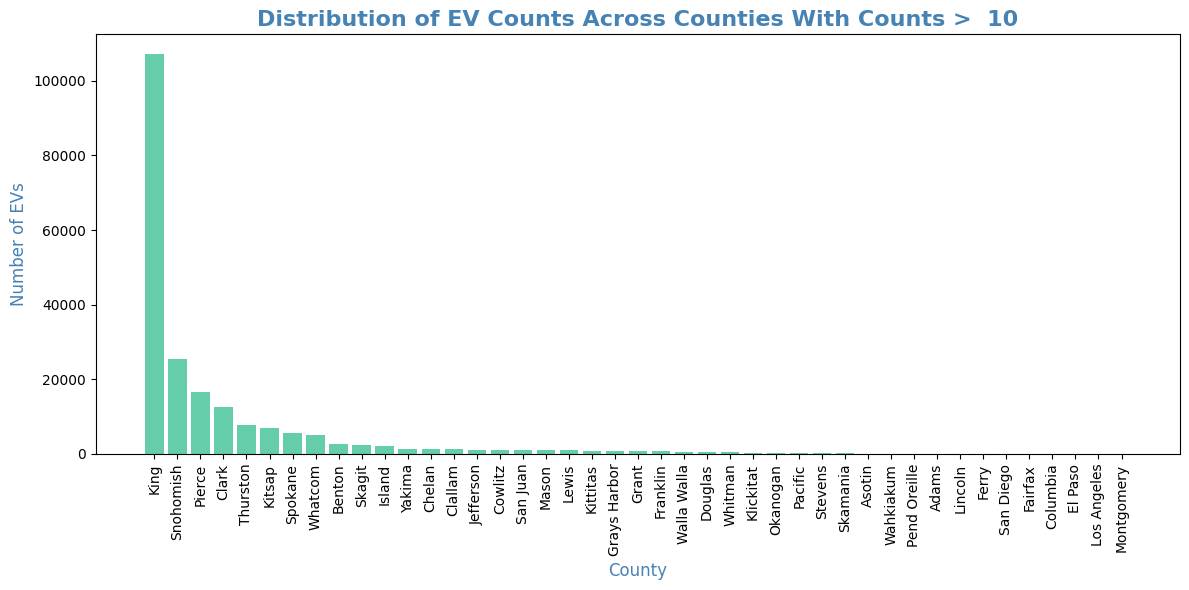

In [121]:


# Plotting with Matplotlib
plt.figure(figsize=(12, 6))
plt.bar(ev_counts_filtered['County'], ev_counts_filtered['EV Count'], color='mediumaquamarine')
plt.title("Distribution of EV Counts Across Counties With Counts >  10", fontsize=16, fontweight='bold', color = "steelblue")
plt.xlabel("County", fontsize=12,color = "steelblue")
plt.ylabel("Number of EVs", fontsize=12, color = "steelblue")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [74]:
ev_counts_filtered

,County,EV Count
0,King,107111
1,Snohomish,25392
2,Pierce,16677
3,Clark,12537
4,Thurston,7719
5,Kitsap,6998
6,Spokane,5700
7,Whatcom,5110
8,Benton,2624
9,Skagit,2366


In [119]:
#look at the distribution of the vehicle types across counties
ev_count_by_county = ev_clean.groupby(['County','Electric Vehicle Type']).size().reset_index(name='Count')
ev_count_by_county

,County,Electric Vehicle Type,Count
0,Adams,Battery Electric Vehicle (BEV),46
1,Adams,Plug-in Hybrid Electric Vehicle (PHEV),21
2,Asotin,Battery Electric Vehicle (BEV),61
3,Asotin,Plug-in Hybrid Electric Vehicle (PHEV),26
4,Benton,Battery Electric Vehicle (BEV),1860
...,...,...,...
80,Whatcom,Plug-in Hybrid Electric Vehicle (PHEV),1305
81,Whitman,Battery Electric Vehicle (BEV),274
82,Whitman,Plug-in Hybrid Electric Vehicle (PHEV),138
83,Yakima,Battery Electric Vehicle (BEV),912


### Data Visualizations

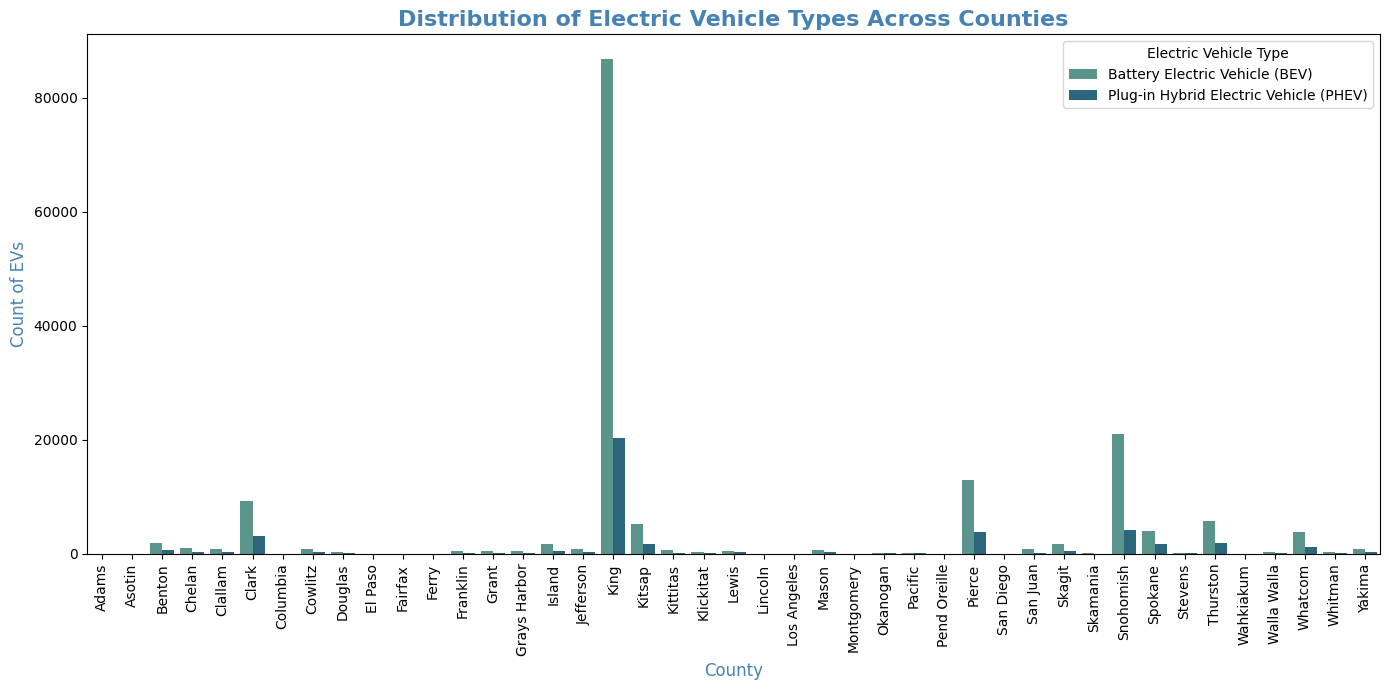

In [120]:
plt.figure(figsize=(14, 7))
sns.barplot(data=ev_count_by_county, x='County', y='Count', hue='Electric Vehicle Type', palette='crest')
# Customize plot
plt.title('Distribution of Electric Vehicle Types Across Counties', fontsize=16, fontweight='bold', color = "steelblue")
plt.xlabel('County', fontsize=12, color = "steelblue")
plt.ylabel('Count of EVs', fontsize=12, color = "steelblue")
plt.xticks(rotation=90) 
plt.tight_layout()

# Show the plot
plt.show()

<center>Figure 1.1 Distribution of BEVs and PHEVs of All Counties</center>

In [100]:
top_10_counties = ev_counts.sort_values(by='EV Count', ascending=False).head(10)
top_10_counties = ev_count_by_county[ev_count_by_county['County'].isin(top_10_counties['County'])]


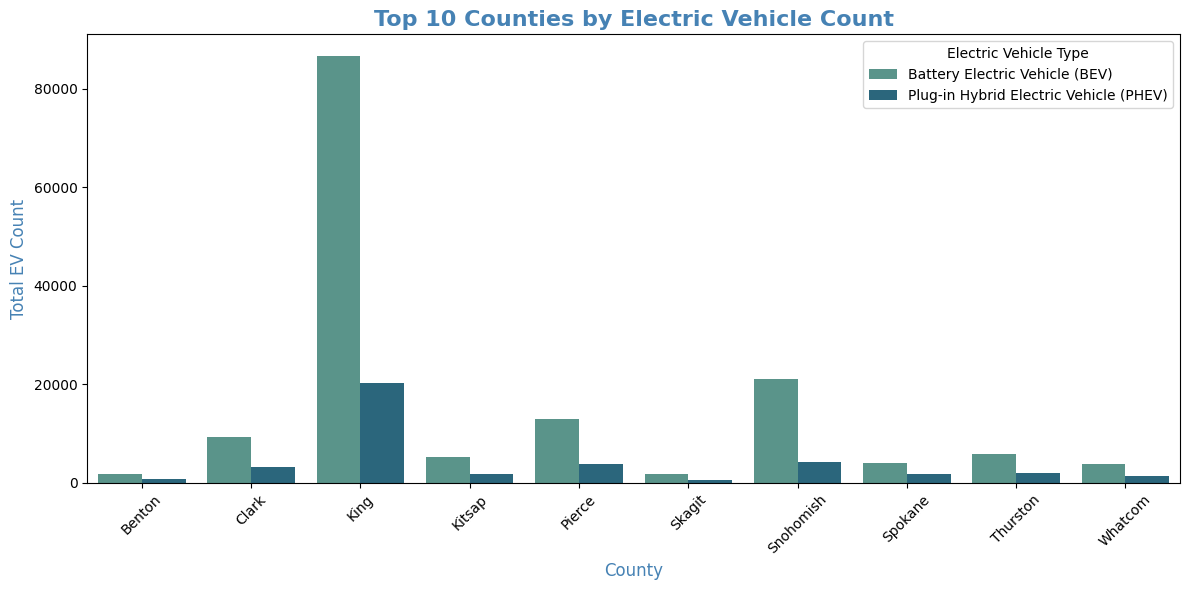

In [112]:
plt.figure(figsize=(12, 6))

sns.barplot(data=top_10_counties, x='County', y='Count', hue='Electric Vehicle Type', palette='crest')

# Customize the plot
plt.title('Top 10 Counties by Electric Vehicle Count', fontsize=16,fontweight='bold', color = "steelblue")
plt.xlabel('County', fontsize=12, color = "steelblue")
plt.ylabel('Total EV Count', fontsize=12, color = "steelblue")
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

<center>Figure 1.2 Distribution of BEVs and PHEVs on 10 Counties with Most EV counts</center>

We can see from the figure 1.1 and 1.2 that the number of BEVs is generally higher than that of PHEVs across the counties. In some counties, the difference in count of the two types of vehicles is particularly different, such as King and Snohomish. The number of BEVs for these counties are around 4-5 times that of PHEVs. Therefore, we can see from this data that in the use of electric vehicles, consumers' preference for BEVs is significantly higher than that for PHEVs. And in terms of the acceptance and usage rate of new energy vehicles, the more economically developed regions will be higher. Countries like King have a greate amount of BEVs and PHEVs showing the economic development of the country is strong, these places would have more charging stations for the BEVs to use, which would make them be more convinient.

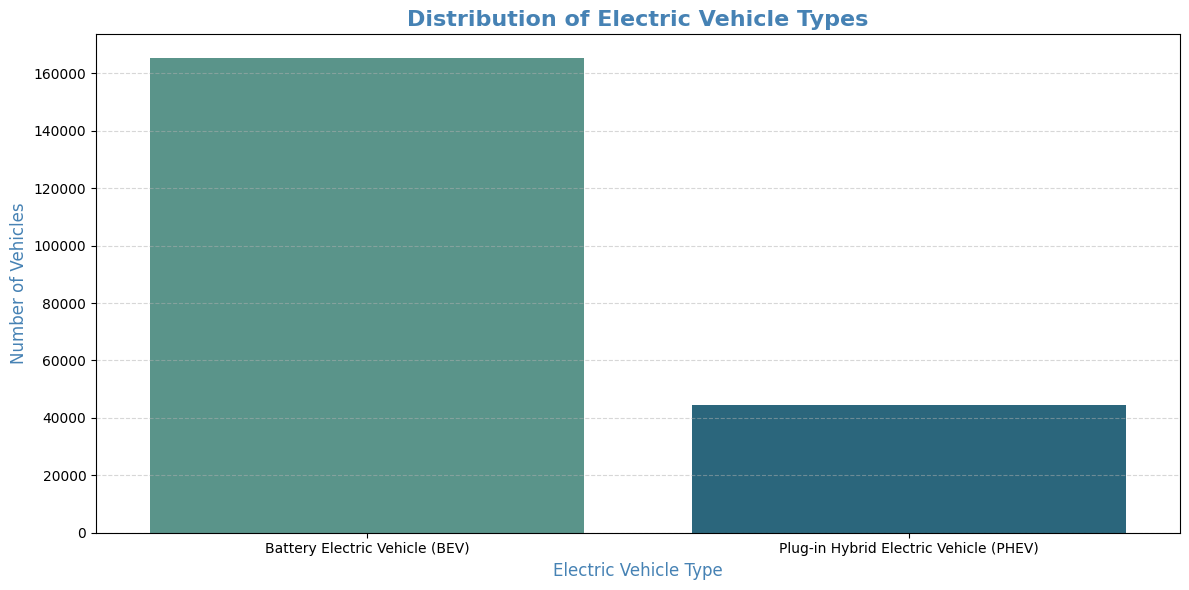

In [127]:
# Calculate the counts for each vehicle type
ev_type_counts = ev_clean['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(12, 6))

sns.barplot(
    x=ev_type_counts.index,
    y=ev_type_counts.values,
    palette="crest",
    hue=ev_type_counts.index,  # Explicitly assign hue
)

# Add labels and titles
plt.title('Distribution of Electric Vehicle Types', fontsize=16, fontweight='bold', color='steelblue')
plt.xlabel('Electric Vehicle Type', fontsize=12, color='steelblue')
plt.ylabel('Number of Vehicles', fontsize=12, color='steelblue')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

<center>Figure 2. Electric Vehicle Types</center>

This chart shows the distribution of the total number of vehicles of the two types of electric vehicles. We can clearly see that the number of BEVs is significantly higher than that of PHEVs. This also proves that the acceptance of BEVs will be higher than that of PHEVs. The reason for this may be that the technology of BEV is equivalent to that of PHEV, and the government's subsidy policy is more inclined towards BEV. BEV usually have simpler designs and gets more benefit from the battery improvement. Comparing to PHEV, BEV have a greater ranges and chiper maintainance. Government also provides a higher subsidies and incentives for BEVs as they are more environmental friendly.

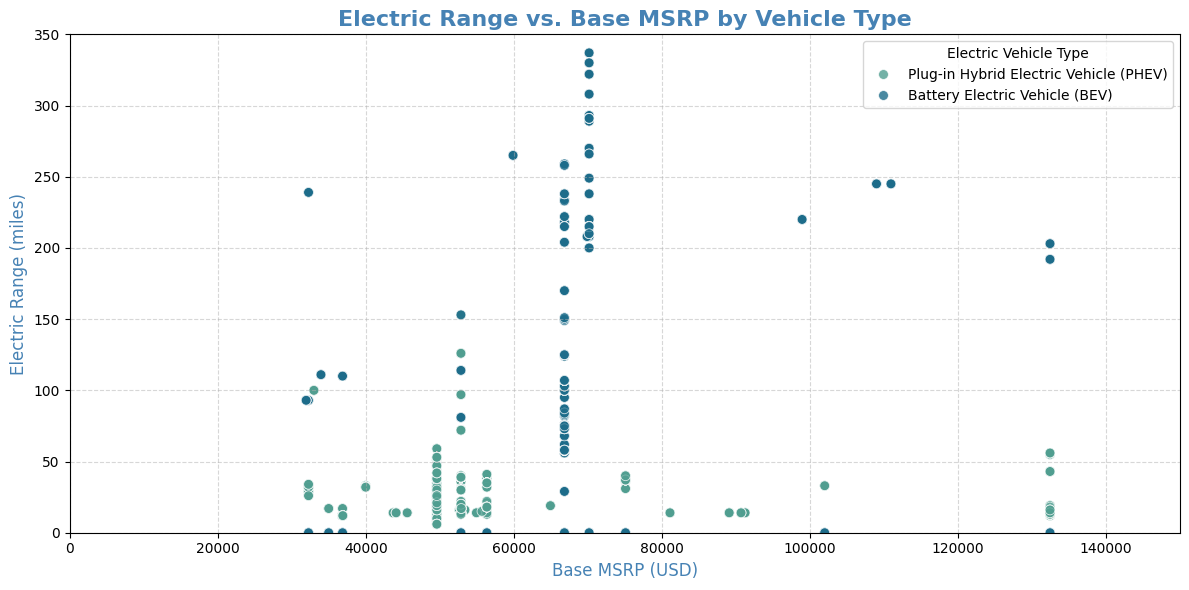

In [130]:
# Scatter Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=ev_clean, 
    x='Base MSRP', 
    y='Electric Range', 
    hue='Electric Vehicle Type', 
    alpha=0.8, 
    palette='crest',
    s=50  # Set marker size for better readability
)

# Limit axes to focus on relevant data
plt.xlim(0, 150000)  # Focus on MSRP less than 150,000
plt.ylim(0, 350)     # Electric range capped at 350 miles


plt.title('Electric Range vs. Base MSRP by Vehicle Type',  fontsize=16, fontweight='bold', color='steelblue')
plt.xlabel('Base MSRP (USD)', fontsize=12, color='steelblue')
plt.ylabel('Electric Range (miles)', fontsize=12,color='steelblue')
plt.grid(axis='both', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Interpretation:
# This scatter plot focuses on relevant price and range data. BEVs generally have higher ranges
# but also higher MSRPs compared to PHEVs. This supports the hypothesis that consumers prefer BEVs for their range advantage.

<center>Figure 3. Correlation between Electric Range and Base MSRP</center>

We can see from the figure 3 that the cruising range of BEVs is significantly higher than that of PHEVs. With a small difference between the price, the cruising range of BEVs is much more higher than that of PHEVs. Therefore, this will also lead consumers to prefer BEVs with a higher cruising range at the same price. The graph also illustrates the improvement of the battery technique. The stack of values on the plot means they are the group mean price that we inputted in the data cleaning step.

## First Analysis You Did - Give it a better title

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [ ]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

## Second Analysis You Did - Give it a better title

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [ ]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

## ETC AD NASEUM

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [ ]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# Ethics & Privacy

**Issues with Privacy and Terms of Use:**

1. The data set including information on vehicle population, school buses, ZEV sales, hydrogen refueling stations, and EV chargers may have specific privacy and terms of use problems. For example, the frequency of someone using a EV charger at a specific location. The data also has location information, such as the zip code and city. The zip code and car make along with VIN could possibly identify the owner for someone who lives in the same zip code. 

**Mitigation of Privacy Risks:**

2. The team will carefully review by and use the data by the term of use for the datasets to make sure that privacy standards are maintained. We would also use aggregation techniques to make sure that no individual or small group can be identified based on the location or frequency of EV infrastructure usage. To solve these privacy issues, our team will implement stric data handling, with clear promise to protect personal and community level privacy throughout the research. We only conduct analysis focusing on the necessary variables, like county and type of vehicle, to avoid any potential privacy issue.



Our team acknowledges that this project might have some potential ethics or privacy issues. However, we shall address all potential biases or privacy concerns regarding the use of the data.

We used the data from data.wa.gov, “Electric Vehicle Population Data," which is intended for public access and use. Our question is about the difference in the preference for hybrid plug-in vehicles versus battery electric vehicles across the counties in Washington. We acknowledge that the data we use is only from Washington State, so it might be limited in expanding the analyses to other states due to various factors. However, this dataset comprises 210,165 samples, each originating from different counties in Washington. The dataset's use and analysis could apply to similar counties with minor ethical or bias issues.


# Discusison and Conclusion

Wrap it all up here.  Somewhere between 3 and 10 paragraphs roughly.  A good time to refer back to your Background section and review how this work extended the previous stuff. 




# Team Contributions

Cecilia

- Worked on data cleaning and data preposessing
- Created data visualizations before EDA
- Acted as project manager to ensure all tasks are finished on time